In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/gtzan-dataset-music-genre-classification/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [15]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
print("libraries imported")

libraries imported


In [18]:
data_dir = '/kaggle/input/gtzan-dataset-music-genre-classification/Data'

features_3_sec = pd.read_csv(os.path.join(data_dir, 'features_3_sec.csv'))
features_30_sec = pd.read_csv(os.path.join(data_dir, 'features_30_sec.csv'))

# Combine the features
X = pd.concat([features_3_sec, features_30_sec])

In [19]:
genres = os.listdir(os.path.join(data_dir, 'genres_original'))
y = []
for genre in X['filename']:
    for g in genres:
        if g in genre:
            y.append(g)
            break
y = pd.Series(y)

In [20]:
music_data = pd.read_csv(r"/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")
music_data.head()
music_data['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Blue


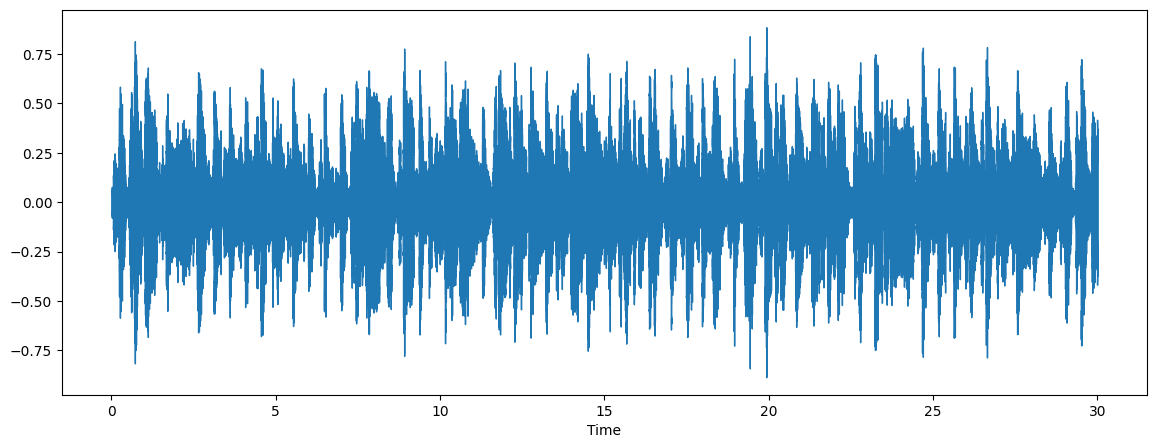

In [21]:
path = r"/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"
plt.figure(figsize=(14,5))
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
print("Blue")

['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean', 'harmony_mean', 'perceptr_mean', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

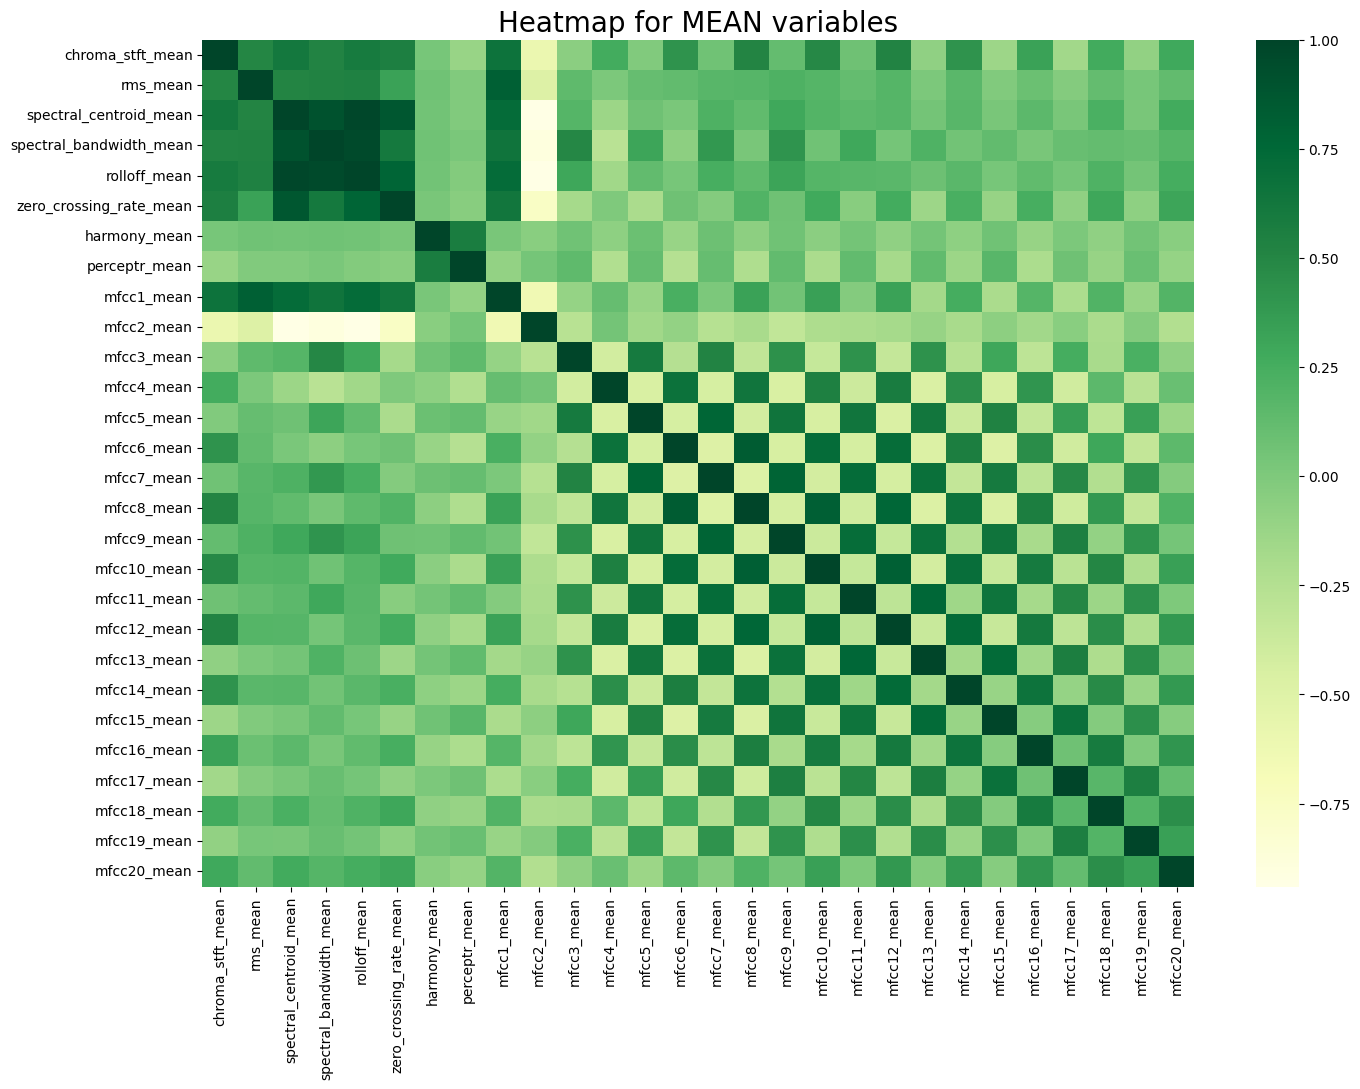

In [22]:
spike_col = [col for col in music_data.columns if 'mean' in col]
print(spike_col)

#Matplotlib Figure
f, ax = plt.subplots(figsize= (16, 11))

#Draw the heatmap 
sns.heatmap(music_data[spike_col].corr(), cmap="YlGn")
plt.title('Heatmap for MEAN variables', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [23]:
label_encode = preprocessing.LabelEncoder()
music_data['label'] = label_encode.fit_transform(music_data['label'])

#filename column is not relevant, so dropping filename column
X = music_data.drop(['label', 'filename'], axis=1)
y = music_data['label']

#Scaling data to make model more stable and train fast
cols = X.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(X)

#New DataFrame with new Scaled Data
X = pd.DataFrame(np_scaled, columns = cols)

X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and label data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

def get_model():
    model = Sequential()
    
    model.add(Flatten(input_shape=(58,))) 
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    
    return model

# Create the model
model = get_model()
model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [42]:
# Compile and fit the model
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_gtzan_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint, reduce_lr, early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/100


I0000 00:00:1730130915.817369     221 service.cc:145] XLA service 0x7accb0004350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730130915.817427     221 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730130915.817432     221 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/22 ━━━━━━━━━━━━━━━━━━━━ 1:31 4s/step - accuracy: 0.0312 - loss: 2.8416

I0000 00:00:1730130918.852968     221 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.0738 - loss: 2.7774
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to best_gtzan_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.0745 - loss: 2.7713 - val_accuracy: 0.2100 - val_loss: 2.2854 - learning_rate: 1.0000e-04
Epoch 2/100
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2500 - loss: 2.3772
Epoch 2: val_accuracy improved from 0.21000 to 0.25333, saving model to best_gtzan_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1657 - loss: 2.3571 - val_accuracy: 0.2533 - val_loss: 2.2560 - learning_rate: 1.0000e-04
Epoch 3/100
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1875 - loss: 2.1711
Epoch 3: val_accuracy did not improve from 0.25333
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2323 - loss: 2.0844 - val_accuracy: 0.2533 - val_loss: 2.2256 - learning_rate: 1.0000e-04
Epoch 4/100
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4375 - loss: 1.974

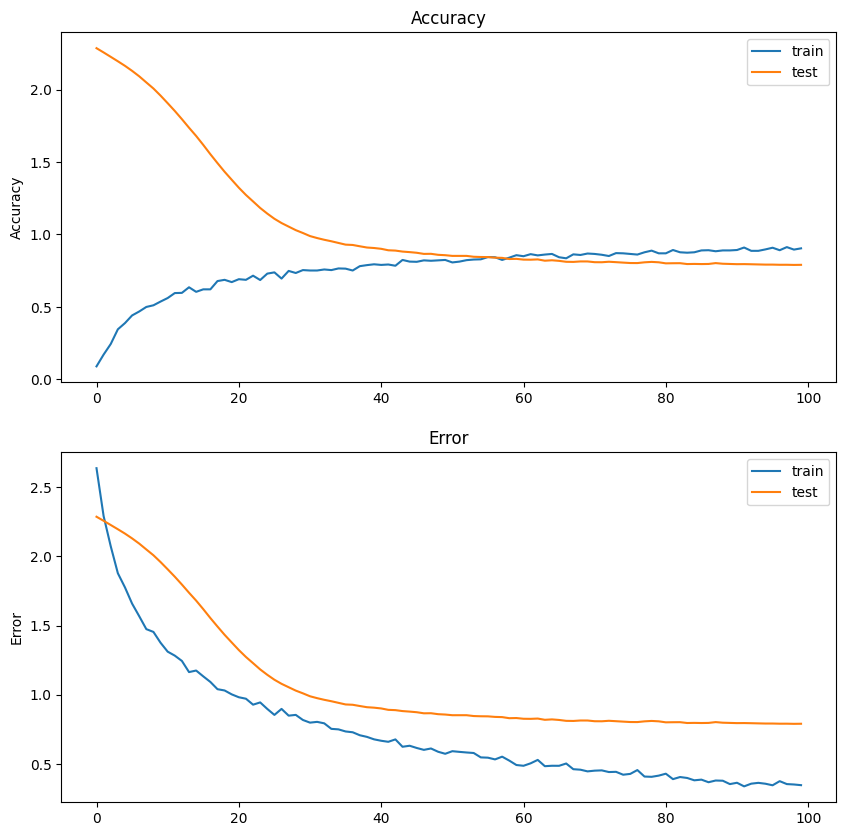

In [43]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()

Training Random Forest Model...
Random Forest Accuracy: 70.67%
Training Time: 0.47 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.84      0.84      0.84        31
           2       0.50      0.58      0.54        26
           3       0.62      0.72      0.67        29
           4       0.81      0.69      0.75        32
           5       0.79      0.79      0.79        34
           6       0.79      0.73      0.76        30
           7       0.83      0.77      0.80        26
           8       0.62      0.68      0.65        31
           9       0.55      0.53      0.54        30

    accuracy                           0.71       300
   macro avg       0.71      0.70      0.71       300
weighted avg       0.71      0.71      0.71       300



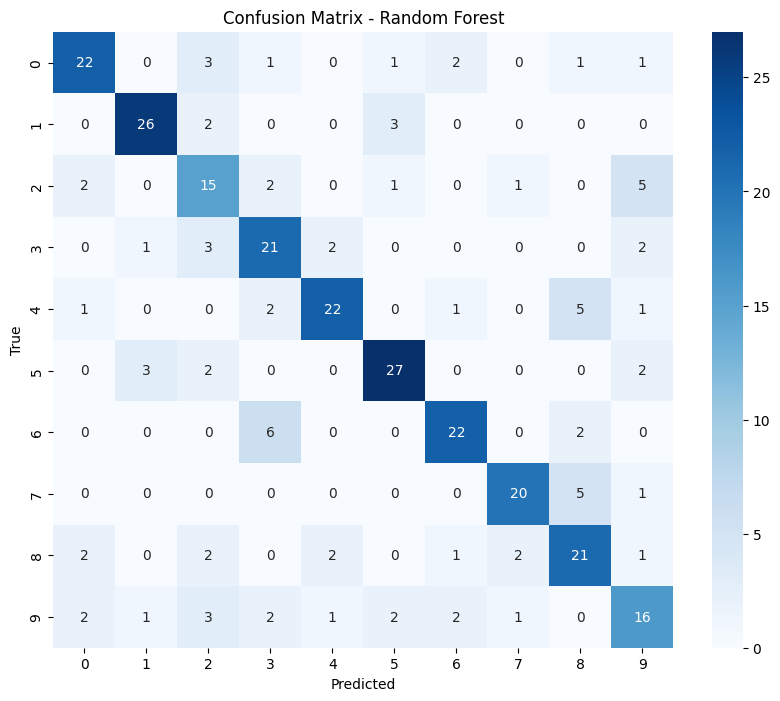

Model saved as 'random_forest_music_classifier.joblib'
Training SVM Model...
SVM Accuracy: 67.00%
Training Time: 0.06 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        31
           1       0.91      0.94      0.92        31
           2       0.68      0.58      0.62        26
           3       0.51      0.62      0.56        29
           4       0.77      0.53      0.63        32
           5       0.82      0.82      0.82        34
           6       0.65      0.80      0.72        30
           7       0.68      0.73      0.70        26
           8       0.54      0.65      0.59        31
           9       0.42      0.43      0.43        30

    accuracy                           0.67       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.68      0.67      0.67       300



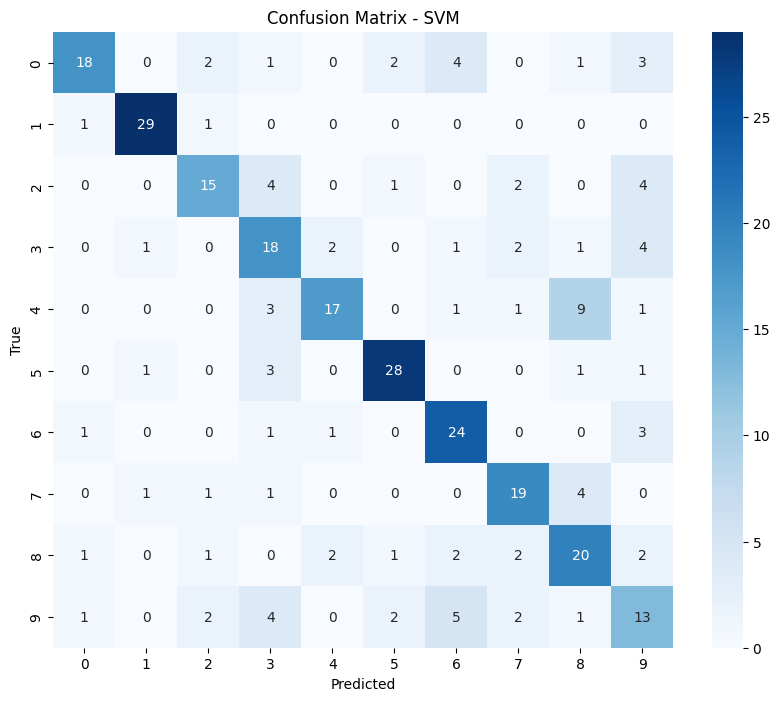

Model saved as 'svm_music_classifier.joblib'
Training KNN Model...
KNN Accuracy: 66.33%
Training Time: 0.09 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        31
           1       0.83      0.97      0.90        31
           2       0.51      0.85      0.64        26
           3       0.47      0.69      0.56        29
           4       0.75      0.56      0.64        32
           5       0.85      0.65      0.73        34
           6       0.89      0.57      0.69        30
           7       0.72      0.69      0.71        26
           8       0.59      0.55      0.57        31
           9       0.48      0.43      0.46        30

    accuracy                           0.66       300
   macro avg       0.69      0.67      0.66       300
weighted avg       0.69      0.66      0.66       300



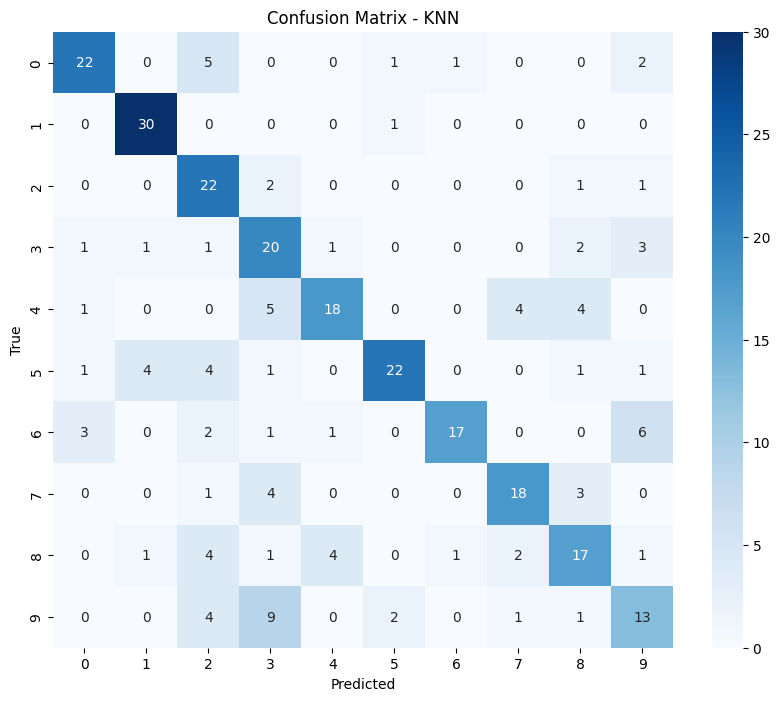

Model saved as 'knn_music_classifier.joblib'
Training Gradient Boosting Model...
Gradient Boosting Accuracy: 74.67%
Training Time: 11.41 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.87      0.84      0.85        31
           2       0.47      0.62      0.53        26
           3       0.74      0.79      0.77        29
           4       0.86      0.75      0.80        32
           5       0.93      0.79      0.86        34
           6       0.88      0.73      0.80        30
           7       0.80      0.77      0.78        26
           8       0.68      0.68      0.68        31
           9       0.56      0.73      0.64        30

    accuracy                           0.75       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.77      0.75      0.75       300



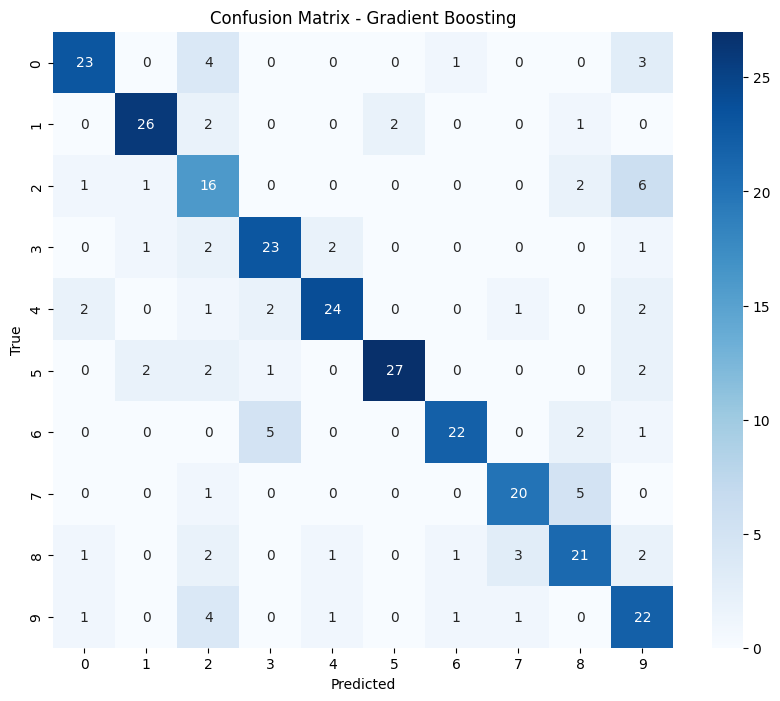

Model saved as 'gradient_boosting_music_classifier.joblib'
Training Naive Bayes Model...
Naive Bayes Accuracy: 52.33%
Training Time: 0.01 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.68      0.50        31
           1       0.87      0.87      0.87        31
           2       0.37      0.38      0.38        26
           3       0.44      0.48      0.46        29
           4       0.71      0.53      0.61        32
           5       0.69      0.26      0.38        34
           6       0.43      0.80      0.56        30
           7       0.82      0.69      0.75        26
           8       0.50      0.39      0.44        31
           9       0.28      0.17      0.21        30

    accuracy                           0.52       300
   macro avg       0.55      0.53      0.52       300
weighted avg       0.55      0.52      0.51       300



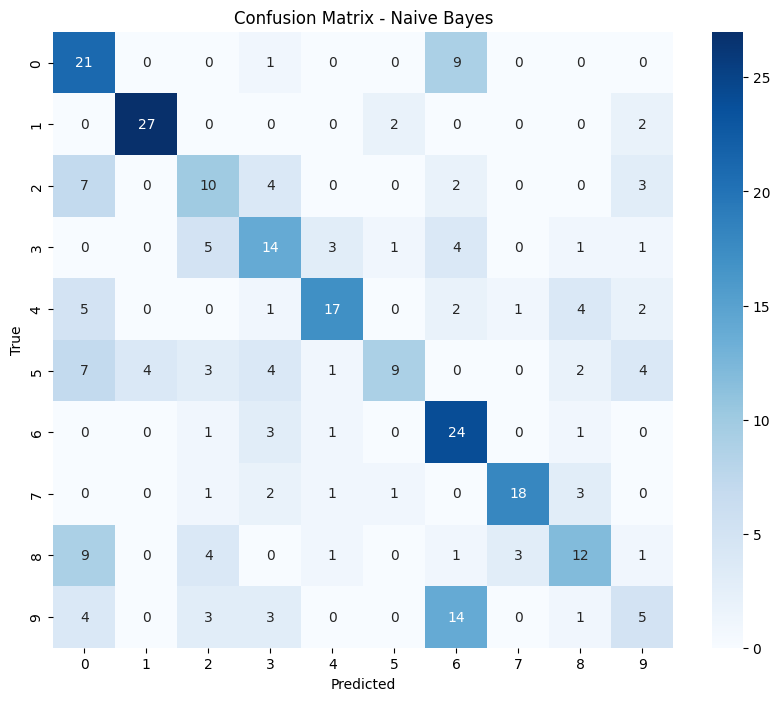

Model saved as 'naive_bayes_music_classifier.joblib'
Training Logistic Regression Model...
Logistic Regression Accuracy: 68.00%
Training Time: 0.15 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        31
           1       0.85      0.90      0.88        31
           2       0.60      0.58      0.59        26
           3       0.55      0.55      0.55        29
           4       0.77      0.62      0.69        32
           5       0.88      0.82      0.85        34
           6       0.62      0.80      0.70        30
           7       0.69      0.77      0.73        26
           8       0.58      0.68      0.63        31
           9       0.60      0.40      0.48        30

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.68      0.68      0.68       300



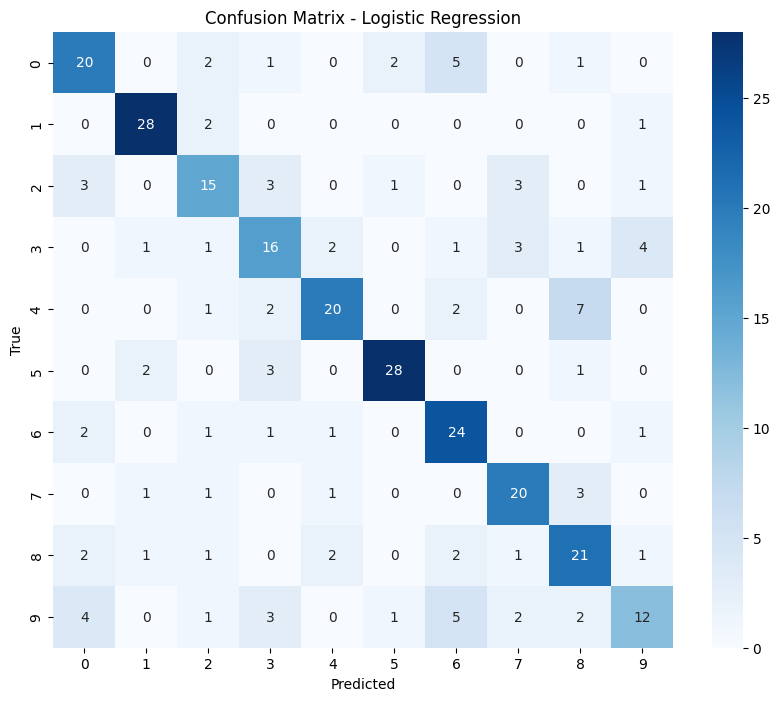

Model saved as 'logistic_regression_music_classifier.joblib'


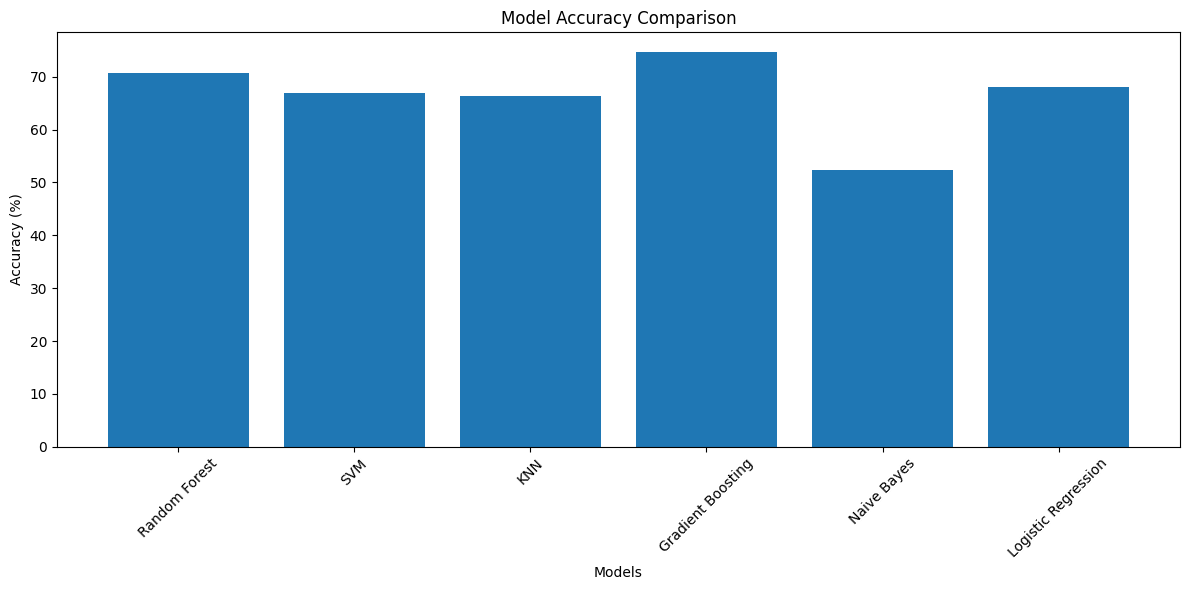


Final Accuracy Comparison:
Random Forest: 70.67%
SVM: 67.00%
KNN: 66.33%
Gradient Boosting: 74.67%
Naive Bayes: 52.33%
Logistic Regression: 68.00%


In [52]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Random Forest Implementation
def train_random_forest():
    from sklearn.ensemble import RandomForestClassifier
    
    print("Training Random Forest Model...")
    start_time = time.time()
    
    # Initialize the model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(rf_model, 'random_forest_music_classifier.joblib')
    print("Model saved as 'random_forest_music_classifier.joblib'")
    
    return rf_model, accuracy

# 2. SVM Implementation
def train_svm():
    from sklearn.svm import SVC
    
    print("Training SVM Model...")
    start_time = time.time()
    
    # Initialize the model
    svm_model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42
    )
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"SVM Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - SVM')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(svm_model, 'svm_music_classifier.joblib')
    print("Model saved as 'svm_music_classifier.joblib'")
    
    return svm_model, accuracy

# 3. KNN Implementation
def train_knn():
    from sklearn.neighbors import KNeighborsClassifier
    
    print("Training KNN Model...")
    start_time = time.time()
    
    # Initialize the model
    knn_model = KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto'
    )
    
    # Train the model
    knn_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"KNN Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - KNN')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(knn_model, 'knn_music_classifier.joblib')
    print("Model saved as 'knn_music_classifier.joblib'")
    
    return knn_model, accuracy

# 4. Gradient Boosting Implementation
def train_gradient_boosting():
    from sklearn.ensemble import GradientBoostingClassifier
    
    print("Training Gradient Boosting Model...")
    start_time = time.time()
    
    # Initialize the model
    gb_model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    
    # Train the model
    gb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = gb_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Gradient Boosting')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(gb_model, 'gradient_boosting_music_classifier.joblib')
    print("Model saved as 'gradient_boosting_music_classifier.joblib'")
    
    return gb_model, accuracy

# 5. Naive Bayes Implementation
def train_naive_bayes():
    from sklearn.naive_bayes import GaussianNB
    
    print("Training Naive Bayes Model...")
    start_time = time.time()
    
    # Initialize the model
    nb_model = GaussianNB()
    
    # Train the model
    nb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = nb_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(nb_model, 'naive_bayes_music_classifier.joblib')
    print("Model saved as 'naive_bayes_music_classifier.joblib'")
    
    return nb_model, accuracy

# 6. Logistic Regression Implementation
def train_logistic_regression():
    from sklearn.linear_model import LogisticRegression
    
    print("Training Logistic Regression Model...")
    start_time = time.time()
    
    # Initialize the model
    lr_model = LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs',
        random_state=42
    )
    
    # Train the model
    lr_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lr_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    joblib.dump(lr_model, 'logistic_regression_music_classifier.joblib')
    print("Model saved as 'logistic_regression_music_classifier.joblib'")
    
    return lr_model, accuracy

# Train all models and compare results
def train_all_models():
    results = {}
    
    # Train each model and store results
    results['Random Forest'] = train_random_forest()
    results['SVM'] = train_svm()
    results['KNN'] = train_knn()
    results['Gradient Boosting'] = train_gradient_boosting()
    results['Naive Bayes'] = train_naive_bayes()
    results['Logistic Regression'] = train_logistic_regression()
    
    # Plot comparison of accuracies
    plt.figure(figsize=(12, 6))
    models = list(results.keys())
    accuracies = [results[model][1] * 100 for model in models]
    
    plt.bar(models, accuracies)
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return results

# Function to load and use saved models
def load_model(model_path):
    """
    Load a saved model and return it
    """
    return joblib.load(model_path)

# Function to make predictions using loaded model
def predict_genre(model, features):
    """
    Make predictions using loaded model
    """
    return model.predict(features)

# Main execution
if __name__ == "__main__":
    # Train all models and get results
    results = train_all_models()
    
    # Print final comparison
    print("\nFinal Accuracy Comparison:")
    for model_name, (model, accuracy) in results.items():
        print(f"{model_name}: {accuracy * 100:.2f}%")